In [1]:
import numpy as np
import pandas as pd
import csv
from scipy import stats

In [2]:
df1 = pd.read_csv("/Users/bouillaud/Downloads/dataset plusieurs milliards d'amis - Pandas - dataset à nettoyer.csv")
df1

,dataset à nettoyer,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Prénom,Age,Taille en m,Pays de naissance,Pays de résidence,Type de logement,Nombre d’animal de compagnie,Salaire mensuel net,Années d’études après le Bac
1,Rana,27,1.61,France,France,Appartement,0,1783,5
2,Mioko,24,1.49,Japan,France,Appartement,-3,477111,2
3,Prisca,24,153,Côte d'ivoire,France,Logement étudiant,0,1502,2
4,Marc,23,1.65,France,France,Logement étudiant,0,1309,0
5,Henri,31,1.82,France,France,Appartement,1,2017,3
6,Hanna,25,3.45,24,France,Maison,5,2540,3
7,Samuel,29,1.75,France,France,Maison,1,4100,5
8,Lee,25,1.66,Chine,France,Studio,A,1998,5
9,Manuel,25,1.79,Mexique,France,Maison,0,37664,5


In [3]:
df2 = pd.read_csv("/Users/bouillaud/Downloads/dataset plusieurs milliards d'amis - Pandas - dataset à nettoyer.csv", skiprows=1, skipfooter=5)
df2


/Users/bouillaud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Prénom,Age,Taille en m,Pays de naissance,Pays de résidence,Type de logement,Nombre d’animal de compagnie,Salaire mensuel net,Années d’études après le Bac
0,Rana,27,1.61,France,France,Appartement,0,1783,5
1,Mioko,24,1.49,Japan,France,Appartement,-3,477111,2
2,Prisca,24,153.00,Côte d'ivoire,France,Logement étudiant,0,1502,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309,0
4,Henri,31,1.82,France,France,Appartement,1,2017,3
5,Hanna,25,3.45,24,France,Maison,5,2540,3
6,Samuel,29,1.75,France,France,Maison,1,4100,5
7,Lee,25,1.66,Chine,France,Studio,A,1998,5
8,Manuel,25,1.79,Mexique,France,Maison,0,37664,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705,5


In [4]:
tmp = df2.columns.values.tolist()
tmp

['Prénom',
 'Age',
 'Taille en m',
 'Pays de naissance',
 'Pays de résidence',
 'Type de logement',
 'Nombre d’animal de compagnie',
 'Salaire mensuel net',
 'Années d’études après le Bac']

In [5]:
df2.columns = [i.replace(' ', '_').lower() for i in tmp]
df2.columns

Index(['prénom', 'age', 'taille_en_m', 'pays_de_naissance',
       'pays_de_résidence', 'type_de_logement', 'nombre_d’animal_de_compagnie',
       'salaire_mensuel_net', 'années_d’études_après_le_bac'],
      dtype='object')

In [6]:
df2

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nombre_d’animal_de_compagnie,salaire_mensuel_net,années_d’études_après_le_bac
0,Rana,27,1.61,France,France,Appartement,0,1783,5
1,Mioko,24,1.49,Japan,France,Appartement,-3,477111,2
2,Prisca,24,153.00,Côte d'ivoire,France,Logement étudiant,0,1502,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309,0
4,Henri,31,1.82,France,France,Appartement,1,2017,3
5,Hanna,25,3.45,24,France,Maison,5,2540,3
6,Samuel,29,1.75,France,France,Maison,1,4100,5
7,Lee,25,1.66,Chine,France,Studio,A,1998,5
8,Manuel,25,1.79,Mexique,France,Maison,0,37664,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705,5


In [8]:
tri_age2 = [(df2.age <18) | (df2.age >100)]
tri_age2

[0     False
 1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 12    False
 13    False
 14    False
 15    False
 16     True
 17    False
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25     True
 26    False
 27    False
 28    False
 Name: age, dtype: bool]

In [9]:
tri_age3 = df2 [ (df2.age <18) | (df2.age >100) ]
tri_age3

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nombre_d’animal_de_compagnie,salaire_mensuel_net,années_d’études_après_le_bac
16,Jane,6,1.52,Thailande,France,Maison,4,2670,5
25,Jean-François,124,1.63,France,NaN,Maison,0,3402,5


In [10]:
#Trouver une valeur Nan
df3 = df2[ df2.isnull().any(axis=1) ]
df3

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nombre_d’animal_de_compagnie,salaire_mensuel_net,années_d’études_après_le_bac
25,Jean-François,124,1.63,France,NaN,Maison,0,3402,5


In [11]:
#permet d'avoir une vision claire des valeurs du dataframe, et les extrêmes.
df2.describe()

,age,taille_en_m,salaire_mensuel_net,années_d’études_après_le_bac
count,29.000000,29.000000,29.000000,29.000000
mean,30.068966,132.894138,33836.413793,4.344828
std,21.603457,425.996661,113182.131009,4.081980
min,6.000000,1.490000,105.000000,0.000000
25%,24.000000,1.650000,1976.000000,3.000000
50%,25.000000,1.760000,2347.000000,5.000000
75%,27.000000,1.930000,3402.000000,5.000000
max,124.000000,1780.000000,477111.000000,24.000000


In [26]:
#rename column name
df2.rename(columns={'nombre_d’animal_de_compagnie': 'nb_animal', 'années_d’études_après_le_bac': 'nb_années_postbac'}, inplace=True)
df2

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783,5
1,Mioko,24,1.49,Japan,France,Appartement,-3,477111,2
2,Prisca,24,153.00,Côte d'ivoire,France,Logement étudiant,0,1502,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309,0
4,Henri,31,1.82,France,France,Appartement,1,2017,3
5,Hanna,25,3.45,24,France,Maison,5,2540,3
6,Samuel,29,1.75,France,France,Maison,1,4100,5
7,Lee,25,1.66,Chine,France,Studio,A,1998,5
8,Manuel,25,1.79,Mexique,France,Maison,0,37664,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705,5


In [29]:
#remplace le A dans le dataframe par un zéro.
df3 = df2.replace({'A': 0})
df3

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783,5
1,Mioko,24,1.49,Japan,France,Appartement,-3,477111,2
2,Prisca,24,153.00,Côte d'ivoire,France,Logement étudiant,0,1502,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309,0
4,Henri,31,1.82,France,France,Appartement,1,2017,3
5,Hanna,25,3.45,24,France,Maison,5,2540,3
6,Samuel,29,1.75,France,France,Maison,1,4100,5
7,Lee,25,1.66,Chine,France,Studio,0,1998,5
8,Manuel,25,1.79,Mexique,France,Maison,0,37664,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705,5


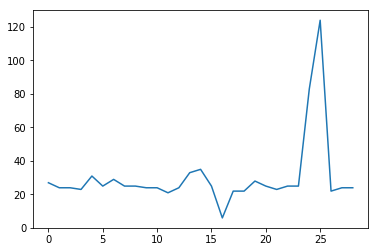

In [35]:
#Montre les outliers Age
import matplotlib.pyplot as plt
age_plot = plt.plot(df3.age)

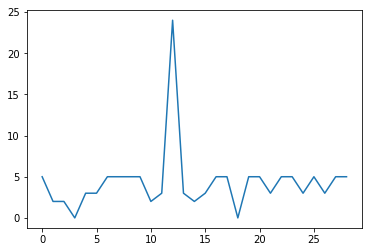

In [36]:
df3['nb_années_postbac'].plot()

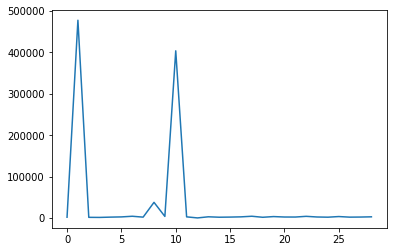

In [37]:
df3['salaire_mensuel_net'].plot()

In [38]:
df3[(df3.taille_en_m > 2.)]

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
2,Prisca,24,153.00,Côte d'ivoire,France,Logement étudiant,0,1502,2
5,Hanna,25,3.45,24,France,Maison,5,2540,3
14,Magalie,35,1530.00,France,France,Studio,0,1790,2
20,David,25,180.00,États Unis,France,Appartement,1,2280,5
26,Mathilde,22,168.00,France,France,Appartement,1,1976,3
28,Jamil,24,1780.00,France,France,Maison,2,2745,5


In [39]:
df3 = df3.replace(153.00, 1.53)
df3 = df3.replace(1530.00, 1.53)
df3 = df3.replace(180.00, 1.80)
df3 = df3.replace(168.00, 1.68)
df3 = df3.replace(1780.00, 1.78)
df3 = df3.replace("Japan", "Japon")
df3

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783,5
1,Mioko,24,1.49,Japon,France,Appartement,-3,477111,2
2,Prisca,24,1.53,Côte d'ivoire,France,Logement étudiant,0,1502,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309,0
4,Henri,31,1.82,France,France,Appartement,1,2017,3
5,Hanna,25,3.45,24,France,Maison,5,2540,3
6,Samuel,29,1.75,France,France,Maison,1,4100,5
7,Lee,25,1.66,Chine,France,Studio,0,1998,5
8,Manuel,25,1.79,Mexique,France,Maison,0,37664,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705,5


In [40]:
df3 = df3.replace("-3", 3)
df3

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783,5
1,Mioko,24,1.49,Japon,France,Appartement,3,477111,2
2,Prisca,24,1.53,Côte d'ivoire,France,Logement étudiant,0,1502,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309,0
4,Henri,31,1.82,France,France,Appartement,1,2017,3
5,Hanna,25,3.45,24,France,Maison,5,2540,3
6,Samuel,29,1.75,France,France,Maison,1,4100,5
7,Lee,25,1.66,Chine,France,Studio,0,1998,5
8,Manuel,25,1.79,Mexique,France,Maison,0,37664,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705,5


In [41]:
sum(df3.loc[:, 'nb_années_postbac'])

126

In [42]:
df4 = df3.replace(df3.loc[1, 'salaire_mensuel_net'], round(477111.0/124.91, 2))
df4

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Logement étudiant,0,1502.00,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,3.45,24,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,37664.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [43]:
df5 = df4.replace(df4.loc[10, 'salaire_mensuel_net'], round(403310.00/124.91, 2))
df5

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Logement étudiant,0,1502.00,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,3.45,24,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,37664.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [44]:
df5["pays_de_résidence"].fillna("France", inplace=True)
df5

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Logement étudiant,0,1502.00,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,3.45,24,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,37664.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [47]:
df5

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Logement étudiant,0,1502.00,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,3.45,24,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,37664.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [56]:
df5['pays_de_naissance'].replace('24', 'France', inplace=True)
df5

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Logement étudiant,0,1502.00,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,3.45,France,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,37664.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [61]:
df5["nb_années_postbac"].replace(24, 0, inplace=True)
df5

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Logement étudiant,0,1502.00,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,3.45,France,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,37664.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [62]:
df5["salaire_mensuel_net"].median()

2347.0

In [64]:
df5["salaire_mensuel_net"].replace(105.00, 2347.0, inplace=True)
df5

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Logement étudiant,0,1502.00,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,3.45,France,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,37664.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [66]:
df5["salaire_mensuel_net"].replace(37664.00, 3139.00, inplace=True)
df5

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Logement étudiant,0,1502.00,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,3.45,France,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,3139.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [78]:
df5.replace(df5.loc[11, "pays_de_naissance"], "Corée du Sud", inplace=True)

In [79]:
df5

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Logement étudiant,0,1502.00,2
3,Marc,23,1.65,France,France,Logement étudiant,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,3.45,France,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,3139.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [81]:
df5.replace(df5.loc[24, "type_de_logement"], "Appartement", inplace=True)
df5

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Appartement,0,1502.00,2
3,Marc,23,1.65,France,France,Appartement,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,3.45,France,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,3139.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [83]:
df5.replace(df5.loc[25, "age"], 24, inplace=True)
df5


,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Appartement,0,1502.00,2
3,Marc,23,1.65,France,France,Appartement,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,3.45,France,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,3139.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [84]:
df5['age'].median()

24.0

In [86]:
df5.replace(df5.loc[16, "age"], 24, inplace=True)
df5


,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Appartement,0,1502.00,2
3,Marc,23,1.65,France,France,Appartement,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,3.45,France,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,3139.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [88]:
df5["taille_en_m"].median()

1.71

In [90]:
df5.replace(df5.loc[5,"taille_en_m"], 1.71, inplace=True)
df5

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Appartement,0,1502.00,2
3,Marc,23,1.65,France,France,Appartement,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,1.71,France,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,3139.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [92]:
df5.replace(df5.loc[27,"pays_de_naissance"], "France", inplace=True)
df5


,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Appartement,0,1502.00,2
3,Marc,23,1.65,France,France,Appartement,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,1.71,France,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,3139.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [94]:
df5.replace(df5.loc[13,"pays_de_naissance"], "France", inplace=True)
df5

,prénom,age,taille_en_m,pays_de_naissance,pays_de_résidence,type_de_logement,nb_animal,salaire_mensuel_net,nb_années_postbac
0,Rana,27,1.61,France,France,Appartement,0,1783.00,5
1,Mioko,24,1.49,Japon,France,Appartement,3,3819.64,2
2,Prisca,24,1.53,Côte d'ivoire,France,Appartement,0,1502.00,2
3,Marc,23,1.65,France,France,Appartement,0,1309.00,0
4,Henri,31,1.82,France,France,Appartement,1,2017.00,3
5,Hanna,25,1.71,France,France,Maison,5,2540.00,3
6,Samuel,29,1.75,France,France,Maison,1,4100.00,5
7,Lee,25,1.66,Chine,France,Studio,0,1998.00,5
8,Manuel,25,1.79,Mexique,France,Maison,0,3139.00,5
9,Suk-Ho,24,1.71,Corée du Sud,France,Appartement,0,3705.00,5


In [100]:
df10 = pd.read_excel("/Users/bouillaud/Downloads/Pandas.xlsx", sheet_name="dataset à explorer")
df10


,dataset à explorer,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Prénom,Age,Situation familiale,Pays de naissance,Pays de résidence,Type de logement,Nombre d’animaux de compagnie,Salaire mensuel net,Années d’études après le Bac,Questions,Réponses
1,Jasmine,32,Marié,Grande Bretagne,France,Maison,3,1527,2,Quelle est la valeur médiane pour chacune des ...,NaN
2,Sakho,21,Célibataire,Corée du Sud,France,Logement étudiant,0,1105,2,Calculer l’écart type des colonnes numériques,NaN
3,Hélène,24,Célibataire,France,France,Maison,2,1863,3,Quelle est la moyenne du nombre d’animaux de c...,NaN
4,Roberto,27,Marié,Espagne,France,Appartement,1,1309,2,Quel est le mode de la colonne « Situation fam...,NaN
5,Benoit,35,Marié,France,France,Maison,0,2581,5,Calculer la valeur moyenne de la colonne « Sal...,NaN
6,Igor,29,Marié,Russie,France,Maison,2,2803,5,NaN,NaN
7,Mioko,22,Célibataire,Japon,France,Maison,0,3400,2,"Pour la colonne « Salaire mensuel net », la mo...",NaN
8,Jung,21,Marié,Chine,France,Maison,2,2652,3,NaN,NaN
9,Toby,34,Célibataire,Grande Bretagne,France,Appartement,0,4100,7,"Si on exclu Toby, quel groupe distinct d’année...",NaN


In [114]:
df11 = df10.drop(["Unnamed: 9", "Unnamed: 10"], axis=1)
df11

,dataset à explorer,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Prénom,Age,Situation familiale,Pays de naissance,Pays de résidence,Type de logement,Nombre d’animaux de compagnie,Salaire mensuel net,Années d’études après le Bac
1,Jasmine,32,Marié,Grande Bretagne,France,Maison,3,1527,2
2,Sakho,21,Célibataire,Corée du Sud,France,Logement étudiant,0,1105,2
3,Hélène,24,Célibataire,France,France,Maison,2,1863,3
4,Roberto,27,Marié,Espagne,France,Appartement,1,1309,2
5,Benoit,35,Marié,France,France,Maison,0,2581,5
6,Igor,29,Marié,Russie,France,Maison,2,2803,5
7,Mioko,22,Célibataire,Japon,France,Maison,0,3400,2
8,Jung,21,Marié,Chine,France,Maison,2,2652,3
9,Toby,34,Célibataire,Grande Bretagne,France,Appartement,0,4100,7


In [119]:
df11.columns

Index(['dataset à explorer', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [129]:
#on renomme les noms de colonnes
df11.columns = (["Prénom", "Age", "Situation familiale","Pays de naissance", "Pays de résidence", "Type de logement", "Nombre d'animaux de compagnie", "Salaire mensuel net", "Années d'études après le bac"])
df11

,Prénom,Age,Situation familiale,Pays de naissance,Pays de résidence,Type de logement,Nombre d'animaux de compagnie,Salaire mensuel net,Années d'études après le bac
0,Prénom,Age,Situation familiale,Pays de naissance,Pays de résidence,Type de logement,Nombre d’animaux de compagnie,Salaire mensuel net,Années d’études après le Bac
1,Jasmine,32,Marié,Grande Bretagne,France,Maison,3,1527,2
2,Sakho,21,Célibataire,Corée du Sud,France,Logement étudiant,0,1105,2
3,Hélène,24,Célibataire,France,France,Maison,2,1863,3
4,Roberto,27,Marié,Espagne,France,Appartement,1,1309,2
5,Benoit,35,Marié,France,France,Maison,0,2581,5
6,Igor,29,Marié,Russie,France,Maison,2,2803,5
7,Mioko,22,Célibataire,Japon,France,Maison,0,3400,2
8,Jung,21,Marié,Chine,France,Maison,2,2652,3
9,Toby,34,Célibataire,Grande Bretagne,France,Appartement,0,4100,7


In [150]:
#on skip la row 0 qui fait doublon
df11 = df11.drop([0], axis=0)

In [151]:
df11

,Prénom,Age,Situation familiale,Pays de naissance,Pays de résidence,Type de logement,Nombre d'animaux de compagnie,Salaire mensuel net,Années d'études après le bac
1,Jasmine,32,Marié,Grande Bretagne,France,Maison,3,1527,2
2,Sakho,21,Célibataire,Corée du Sud,France,Logement étudiant,0,1105,2
3,Hélène,24,Célibataire,France,France,Maison,2,1863,3
4,Roberto,27,Marié,Espagne,France,Appartement,1,1309,2
5,Benoit,35,Marié,France,France,Maison,0,2581,5
6,Igor,29,Marié,Russie,France,Maison,2,2803,5
7,Mioko,22,Célibataire,Japon,France,Maison,0,3400,2
8,Jung,21,Marié,Chine,France,Maison,2,2652,3
9,Toby,34,Célibataire,Grande Bretagne,France,Appartement,0,4100,7
10,Loïc,33,Marié,France,France,Maison,0,2208,3


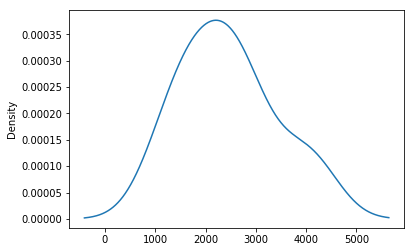

In [179]:
df11["Salaire mensuel net"].plot(kind="kde")

In [156]:
type_logement = df11["Type de logement"].value_counts()
type_logement

Maison               10
Appartement           3
Logement étudiant     1
Name: Type de logement, dtype: int64

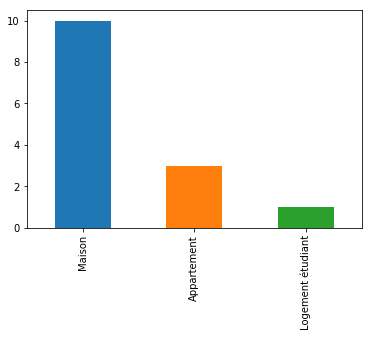

In [158]:
type_logement.plot(kind="bar")

In [164]:
post_bac_gp = df11["Années d'études après le bac"].value_counts()

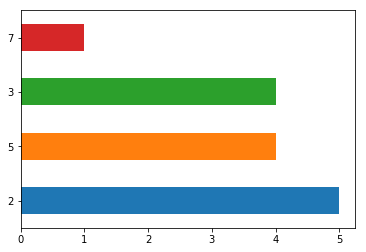

In [168]:
post_bac = post_bac_gp.plot(kind="barh")

## Réponses aux questions : 

Quelle est la valeur médiane pour chacune des colonnes ?

In [181]:
df11["Age"].median()

28.0

In [182]:
df11["Nombre d'animaux de compagnie"].median()

1.0

In [183]:
df11["Salaire mensuel net"].median()

2394.5

In [184]:
df11["Années d'études après le bac"].median()

3.0

Calculer l’écart type des colonnes numériques

In [190]:
print("Ecart type - Age:", df11["Age"].std())
print("Ecart type - Nb animaux :", df11["Nombre d'animaux de compagnie"].std())
print("Ecart type - Salaire mensuel:", df11["Salaire mensuel net"].std())
print("Ecart type - Etudes postbac:", df11["Années d'études après le bac"].std())

Ecart type - Age: 6.009150531471991
Ecart type - Nb animaux : 1.3114039117603014
Ecart type - Salaire mensuel: 944.4309991142351
Ecart type - Etudes postbac: 1.6052797503622467


Quelle est la moyenne du nombre d’animaux de compagnie ?

In [191]:
df11["Nombre d'animaux de compagnie"].mean()

1.2142857142857142

Quel est le mode de la colonne « Situation familiale » ?

In [192]:
df11["Situation familiale"].mode()

0    Marié
dtype: object

Calculer la valeur moyenne de la colonne « Salaire mensuel net » ?

In [193]:
df11["Salaire mensuel net"].mean()

2446.285714285714

Pour la colonne « Salaire mensuel net », la moyenne est-elle égale à la médiane ?

In [194]:
if df11["Salaire mensuel net"].mean() == df11["Salaire mensuel net"].median():
    print("La moyenne est égale à la médiane")
else: 
    print("La moyenne est différente de la médiane")
    

La moyenne est différente de la médiane


Si on exclu Toby, quel groupe distinct d’années d’études a le plus haut salaire moyen, médian ?

In [201]:
df_sans_toby = df11.drop([9], axis=0)
df_sans_toby

,Prénom,Age,Situation familiale,Pays de naissance,Pays de résidence,Type de logement,Nombre d'animaux de compagnie,Salaire mensuel net,Années d'études après le bac
1,Jasmine,32,Marié,Grande Bretagne,France,Maison,3,1527,2
2,Sakho,21,Célibataire,Corée du Sud,France,Logement étudiant,0,1105,2
3,Hélène,24,Célibataire,France,France,Maison,2,1863,3
4,Roberto,27,Marié,Espagne,France,Appartement,1,1309,2
5,Benoit,35,Marié,France,France,Maison,0,2581,5
6,Igor,29,Marié,Russie,France,Maison,2,2803,5
7,Mioko,22,Célibataire,Japon,France,Maison,0,3400,2
8,Jung,21,Marié,Chine,France,Maison,2,2652,3
10,Loïc,33,Marié,France,France,Maison,0,2208,3
11,Magalie,35,Célibataire,France,France,Appartement,0,1790,2


In [209]:
df_short_sans_toby = df_sans_toby[["Salaire mensuel net", "Années d'études après le bac"]]
df_short_sans_toby

,Salaire mensuel net,Années d'études après le bac
1,1527,2
2,1105,2
3,1863,3
4,1309,2
5,2581,5
6,2803,5
7,3400,2
8,2652,3
10,2208,3
11,1790,2


In [235]:
df_short_sans_toby = df_short_sans_toby.sort_values(["Années d'études après le bac"])

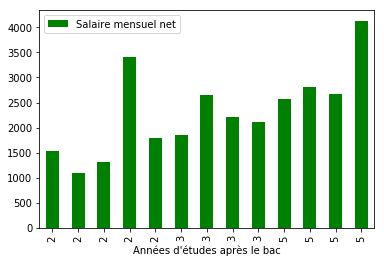

In [262]:
df_short_sans_toby.plot(x = "Années d'études après le bac", kind="bar", color="g")

D’après vous, parmi les 6 personnes qui n'ont pas d'animal, qui est le plus susceptible d'en adopter un ? Pourquoi ?

In [243]:
marié = df_sans_toby["Situation familiale"] == "Marié"
maison = df_sans_toby["Type de logement"] == "Maison"
no_animaux = df_sans_toby["Nombre d'animaux de compagnie"] == 0

In [246]:
#Avec un salaire plus élevé, on peut déduire que benoît sera plus à même d'acquérir un animal de compagnie.
df_sans_toby[marié & maison & no_animaux]

,Prénom,Age,Situation familiale,Pays de naissance,Pays de résidence,Type de logement,Nombre d'animaux de compagnie,Salaire mensuel net,Années d'études après le bac
5,Benoit,35,Marié,France,France,Maison,0,2581,5
10,Loïc,33,Marié,France,France,Maison,0,2208,3
